# Linear Regression

Over 370,000 used cars were scraped from Ebay-Kleinanzeigen. The content of the data is in German. The data is available [here](https://www.kaggle.com/orgesleka/used-cars-database) The fields included in the file data/autos.csv are:

- seller : private or dealer
- offerType
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- price : the price on the ad to sell the car. 

**Goal**  
Given the characteristics/features of the car, the sale price of the car is to be predicted. 

In [1]:
#import the required libraries
import pandas as pd
import numpy as np

In [2]:
#Read the dataset
cars = pd.read_csv("../input/autos.csv", encoding='latin1')

In [3]:
#Display the first few rows
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#Display the columns in the dataset
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
#what are the types of the columns?
cars.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [6]:
#Find if data has missing values?
#Find missing values by each column
cars.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
#Find proportion of data that is missing for each of the columns
cars.isnull().sum()/cars.shape[0] * 100

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

In [8]:
#For this exercise, let's drop the rows that have null values

cars_updated = cars.dropna()

In [9]:
cars.shape, cars_updated.shape

((371528, 20), (260956, 20))

In [10]:
#check if there are any missing values
cars_updated.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [11]:
#Display first few records of cars_updated
cars_updated.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [12]:
cars_updated.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [13]:
#Let's use only the following columns for our modeling now
cars_updated = cars_updated.iloc[:, [2,3,6,7,8,9,10,11,12,13,14,15,4]]

In [14]:
#Convert text to numeric using Label Encoding
from sklearn import preprocessing

In [15]:
#encode the data
cars_encoded = cars_updated.apply(preprocessing.LabelEncoder().fit_transform)

In [16]:
#Display the first few records
cars_encoded.head()

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,1,0,4,71,1,75,118,12,6,1,37,1,579
4,1,0,4,78,1,69,103,9,7,3,31,1,1146
5,1,0,6,65,1,102,11,12,10,1,2,0,271
6,1,0,2,74,1,109,8,12,8,1,25,1,777
7,1,0,6,50,1,50,40,4,7,1,37,1,0


In [17]:
cars_encoded.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [18]:
#Exploratory data analysis
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# plt.rcParams['figure.figsize'] = (10, 6)

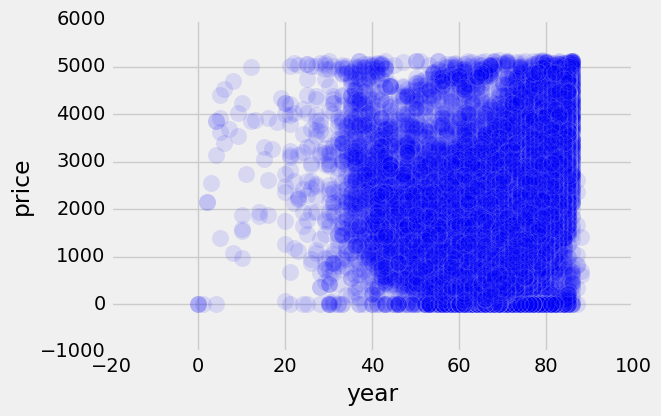

In [19]:
#Plot year vs price
plt.scatter(cars_encoded.yearOfRegistration, 
           cars_encoded.price,
           s=150, alpha = 0.1)
plt.xlabel('year')
plt.ylabel('price')

### Linear Regression Model

In [20]:
from sklearn import linear_model

In [21]:
#Instantiate the model
model_sklearn = linear_model.LinearRegression()

In [22]:
#fit the model
model_sklearn.fit(cars_encoded.iloc[:,:12], cars_encoded.iloc[:,12])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#Regression coefficients
model_sklearn.coef_

array([ -7.73583644e+02,  -5.16902417e+02,  -3.17571680e+01,
         4.69956093e+01,  -1.86937473e+02,   7.32910727e+00,
         7.68013315e-02,  -1.26027079e+02,   7.97629234e-01,
         1.18614137e+02,   5.34609215e-01,   4.68335304e+02])

In [24]:
#Model intercept
model_sklearn.intercept_

-1177.873810384272

### Validation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Split into train and validation
x_train, x_test, y_train, y_test = train_test_split(cars_encoded.iloc[:,:12], 
                                                    cars_encoded.iloc[:,12],
                                                    test_size=0.2)

In [27]:
#Display data shape
cars_encoded.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((260956, 13), (208764, 12), (208764,), (52192, 12), (52192,))

In [28]:
#Instantiate the model
model_sklearn_tv = linear_model.LinearRegression()

In [29]:
#fit the model
model_sklearn_tv.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred = model_sklearn_tv.predict(x_test)

In [31]:
#Find error : RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

617.10133598716561